
<center>
<h1>An introduction to FEniCS</h1>
<br/>
<img src='fenics_logo.png' alt='Scaling test'  width='200'>

<br/>
<h3>Simon Funke</h3>
<br/>
12th October 2016, UNISA Symposium
<br/>
Contributors: Hans Petter Langtangen, Anders Logg, Marie E. Rognes, André Massing
</center>

In [1]:
%matplotlib inline

# Contents

* What is FEniCS?
* *Hello world* for scientific computing
* The Gray-Scott equations
* Installation and getting started

Slides URL: goo.gl/pR68a5

# What is FEniCS?

## FEniCS is an automated programming environment for differential equations
<center>
<img src='fenics_webpage.png' alt='Scaling test'  width='800'>
http://fenicsproject.org/
</center>

* C++/Python library
* Initiated 2003 in Chicago
* 1000–2000 monthly downloads
* Licensed under the GNU LGPL

## Collaborators

* Simula Research Laboratory
* University of Cambridge
* University of Chicago
* Texas Tech University
* KTH Royal Institute of Technology 
* Chalmers University of Technology
* Imperial College London
* University of Oxford
* Charles University in Prague
* ...

## FEniCS uses code generation to combine generality with performance

<center><img src='compiler.svg' alt='Compiler'  width='800'></center>

## Some PDEs that have been solved with FEniCS 

* Burgers
* Navier-Stokes
* Stokes + mantle rheology
* Stokes + ice rheology
* Saint Venant + wetting/drying
* Cahn-Hilliard
* Gray-Scott
* Shallow ice
* Blatter-Pattyn
* Quasi-geostrophic
* Viscoelasticity
* Gross-Pitaevskii
* Yamabe
* Image registration
* Bidomain

## FEniCS code can be readable and scale with mathematical complexity
<center><img src='stokes1.png' alt='Compiler'  width='1024'></center>

## FEniCS provides a wide range of (mixed) finite element spaces
<center><img src='stokes2.png' alt='Compiler'  width='1024'></center>

## FEniCS provides an expressive form language close to mathematical syntax
<center><img src='stokes3.png' alt='Compiler'  width='1024'></center>

## FEniCS can be high-performant

<center><img src='richardsonwellsarcherscaling.svg' alt='Scaling test'  width='900'>
<small>Authors: Chris N. Richardson, Garth Wells<br/> https://figshare.com/articles/Parallel_scaling_of_DOLFIN_on_ARCHER/1304537</center></small>


## The *Hello world* for scientific computing in FEniCS

**Our goal**: Solve the Poisson problem:

Find $u$ which solves 

\begin{align*}
- \Delta u = f && \text{ in } \Omega, \\
u = u_0 && \text{ on } \partial \Omega,
\end{align*}

with $u_0 = 1 + x^2 + 2y^2$ and $f=6$.

The Poisson equation arises in:
* heat conduction, electrostatics, diffusion of substances, twisting of elastic rods, inviscid fluid flow, water waves, magnetostatics
* as part of numerical splitting strategies of more complicated systems of PDEs, in particular the Navier–Stokes equations

## Solving a PDE in FEniCS
Solving a physical problem with FEniCS consists of the
following steps:

1. Identify the PDE and its boundary conditions
2. Reformulate the PDE problem as a variational problem
3. Make a Python program where the formulas in the variational problem are coded, along with definitions of $f$, $u_0$ and a mesh for $\Omega$
4. Add statements in the program for solving the variational problem and visualizing the results

## The Finite Element Method Recipe
<center><img src='fem_steps.png' alt='FEM steps'  width='800'>
</center>

## Step 1: Deriving the variational formulation

The simple recipe is: 

Multiply the PDE by a test function $v$ and
integrate over $\Omega$:
\begin{equation*}
-\int_\Omega (\Delta u)v \text{d}x = \int_\Omega fv\text{d}x
\end{equation*}

Then integrate by parts and set $v = 0$ on the Dirichlet boundary:
\begin{equation*}
-\int_\Omega (\Delta u) v \text{d}x
= \int_\Omega \nabla u\cdot\nabla v\text{d}x -
\underbrace{\int_{\partial\Omega} \frac{\partial u}{\partial n} v\text{d}s}_{\color{red}{=0}}
\end{equation*}

We find that:
\begin{equation*}
\int_\Omega\nabla u\cdot\nabla v\text{d}x = \int_\Omega fv\text{d}x
\end{equation*}

## Canonical variational problem
  The following canonical notation is used in FEniCS: find
  $u \in V$ such that
  \begin{equation*}
    a(u, v) = L(v)
  \end{equation*}
  for all $v \in \hat{V}$

  For Poisson's equation, we have
  \begin{align*}
    a(u, v) &= \int_{\Omega} \nabla u \cdot \nabla v \text{d}x
    \\
    L(v) &= \int_{\Omega} fv \text{d}x
  \end{align*}

  $a(u, v)$ is a **bilinear form** and $L(v)$ is a **linear form**.

## Implementation in FEniCS

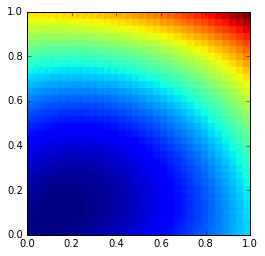

In [7]:
from fenics import *
# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-9.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution
plot(u)

## Step by step: the first line

  The first line of a FEniCS program usually begins with

```python
from fenics import *
```

This imports key classes like **UnitSquareMesh**, **FunctionSpace**,
**Function** and so forth, from the FEniCS user interface
(DOLFIN)


## Step by step: Creating a mesh

Next, we create a mesh of our domain $\Omega$:

```python
mesh = UnitSquareMesh(8, 8)
```
This defines a mesh of $8 \times 8 \times 2 = 128$ triangles of the
unit square.

Other useful classes for creating built-in meshes include
* UnitIntervalMesh
* UnitCubeMesh
* UnitCircleMesh
* UnitSphereMesh
* RectangleMesh
* BoxMesh

## Step by step: Creating more complex meshes

More complex geometries can be built using Constructive Solid
Geometry (CSG) through the FEniCS component **mshr**:

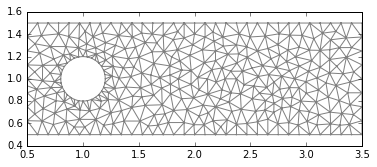

In [3]:
from mshr import *
r = Rectangle(Point(0.5, 0.5), Point(3.5, 1.5))
c = Circle(Point(1.0, 1.0), 0.2)
g = r - c
mesh = generate_mesh(g, 20)
plot(mesh)

## Step by step: Loading external meshes

Meshes created with external software (for example **Gmsh** can be converted into FEniCS own mesh formated with:
```bash
dolfin-convert dolfin.msh dolfin.xml.gz
```
and loaded with

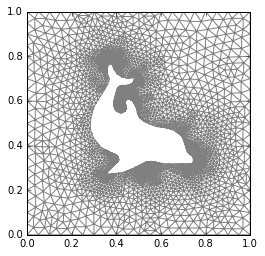

In [4]:
mesh = Mesh("dolfin.xml.gz")
plot(mesh)

## Step by step: Creating a function space

  The following line creates a finite element function space relative to this mesh:

```python
V = FunctionSpace(mesh, "Lagrange", 1)
```

  The second argument specifies the type of element, while the third
  argument is the degree of the basis functions on the element

Other types of elements include
* `"Discontinuous Lagrange"`
* `"Brezzi-Douglas-Marini"`
* `"Raviart-Thomas"`
* `"Crouzeix-Raviart"`
* `"Nedelec 1st kind H(curl)"`
* `"Nedelec 2nd kind H(curl)"`

## Step by step: defining expressions

Next, we define an expression for the boundary value:
```python
u0 = Expression("1 + x[0]*x[0] + 2*x[1]*x[1]", degree=2)
```
The formula must be written in C++ syntax, and
the polynomial degree must be specified.

The **Expression** class is very flexible and can be used to
create complex user-defined expressions. For more information, try
```python
from fenics import *
help(Expression)
```

## Step by step: defining a boundary condition

The following code defines a Dirichlet boundary condition:
```python
bc = DirichletBC(V, u0, "on_boundary")
```

This boundary condition states that a function in the function space
defined by **V** should be equal to **u0** on the domain defined
by **"on_boundary"**

Note that the above line does not yet apply the boundary condition
to all functions in the function space.

## Step by step: more about defining domains
For a Dirichlet boundary condition, a simple domain can be defined
by a string
```python
"on_boundary" # The entire boundary
```

Alternatively, domains can be defined by subclassing **SubDomain**:
```python
class Boundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary
```

There are many more possibilities, see
```python
help(SubDomain)
help(DirichletBC)
```

## Step by step: defining the right-hand side

The right-hand side $f = - 6$ may be defined as follows:
```python
f = Expression("-6.0", degree=0)
```

or (more efficiently) as
```python
f = Constant(-6.0)
```

## Step by step: defining variational problems

Variational problems are defined in terms of **trial** and
**test** functions:

```python
u = TrialFunction(V)
v = TestFunction(V)
```

We now have all the objects we need in order to specify the bilinear
form **a(u,v)** and the linear form **L(v)**:

```python
a = inner(grad(u), grad(v))*dx
L = f*v*dx
```

## Step by step: solving variational problems

Once a variational problem has been defined, it may be solved
by calling the `solve` function:

```python
u = Function(V)
solve(a == L, u, bc)
```

Note the reuse of the variable name *u* as both a *TrialFunction*
in the variational problem and a *Function* to store the solution.

## Step by step: post-processing

The solution and the mesh may be plotted by simply calling:
```python
plot(u)
pylab.show()
plot(mesh)
pylab.show()
```

For postprocessing in ParaView or MayaVi, store the solution in VTK
format:
```python
file = File("poisson.pvd")
file << u
```

## Fun break - Welcome to the FEniCS Twitter Bot

<center>
<img src='fenicsbot.png' alt='Twitter FEniCS bot'  width='1024'>
https://twitter.com/fenicsbot
</center>

## Complex Patterns in a simple system - the Gray-Scott equations

## Can we model patterns that occur in nature?

<center>
<img src='zebra.jpg' alt='Zebra: Source wikipedia'  width='500'>
<img src='butterfly.jpg' alt='Zebra: Source wikipedia'  width='500'>
</center>

## The Gray-Scott equations describe for formation of such patterns

The Gray-Scott equations are:                                                                                                  

\begin{equation}
\begin{aligned}
\frac{\partial u}{\partial t} & = D_u \Delta u - u v^2 + F(1-u) \qquad \text{in } \Omega, \\  
\frac{\partial v}{\partial t} & = D_v \Delta v + u v^2 - (F+k)v \qquad \text{in } \Omega,     
\end{aligned} 
\end{equation}       
where $u$ and $v$ are the two unknowns, $D_u$ and $D_v$ are the diffusion coefficients, $k$ is the rate constant of the second reaction and $F$ the feed rate.

In addition we need initial and boundary conditions:
\begin{equation}
\begin{aligned}
u = u_0, \quad v = v_0 \qquad \text{ at } t = 0\\
\nabla u \cdot n = 0, \quad \nabla v \cdot n = 0 \qquad \text{ on } \partial \Omega
\end{aligned} 
\end{equation}       

**New challenges:** This is a time-dependent, coupled, non-linear PDE!

## The solution pattern varies depending on the choice of `k` and `F` 

<center>
<img src='gray_scott_solutions.png' alt='Zebra: Source wikipedia'  width='500'>
<small>From: *The (unfinished) PDE coffee table book, chapter 22*</small>
</center>

## Step by step: Discretization in time

We choose to discretize the backward Euler.

Given the solution $u_0, v_0$ at the time $t$, we
can compute at time $t+ts$ with:

\begin{equation}                                                                                                                                                                                            
\begin{aligned}                                                                                                                                                                                             
\frac{u - u_0}{ts} & = D_u \nabla^2 u - u v^2 + F(1-u), \\                                                                                                                                       
\frac{v - v_0}{ts} & = D_v \nabla^2 v + u v^2 - (F+k)v,                                                                                                                                          
\end{aligned}                                                                                                                                           
\end{equation}   

At each time step, we now have a steady PDE for which we can use FEniCS!

## Step by step: Derivation of the weak-formulation

We multiply the first equation with test functions $p$ and the second equation with $q$ and integrate over the domain:

\begin{equation}                                                                                                                                                                                            
\begin{aligned}                                                                                                                                                                                             
\int_\Omega \frac{u - u_0}{ts} p \text{d} x & = \int_\Omega D_u \Delta up - u v^2p+ F(1-u) p \text{d}x, \\                                                                                                       
\int_\Omega \frac{v - v_0}{ts} q \text{d} x& = \int_\Omega D_v \Delta vq + u v^2q - (F+k)v q\text{d}x.                                                                                                                              
\end{aligned}                                                                                                                                           
\end{equation}  

Next, we integrate by parts the terms with second order derivatives:
\begin{equation}                                                                                                                                                                                            
\begin{aligned}                                                                                                                                                                                             
\int_\Omega \frac{u - u_0}{ts} p \text{d} x & =  \int_\Omega - D_u \nabla u \cdot \nabla p - u v^2 p + F(1-u) p \text{d}x + \int_{\partial \Omega} \underbrace{D_u \nabla u \cdot n p}_{\color{red}{=0}} \text{d}s, \\                                                                                                       
\int_\Omega \frac{v - v_0}{ts} q \text{d} x& = \int_\Omega - D_v \nabla v \cdot \nabla q  + u v^2 q- (F+k)vq\text{d}x + \int_{\partial \Omega} \underbrace{D_v \nabla v \cdot n q}_{\color{red}{=0}}\text{d}s.                                                       
\end{aligned}                                                                                                                                           
\end{equation}  

## Step by step: Canonical form for nonlinear variational problems

The following canonical notation is used in FEniCS for (possibly)
nonlinear problems:

  Find $z \in Z$ such that
  \begin{equation*}
    F(z; y) = 0
  \end{equation*}
  for all testfunctions $y$.

**Note**:
Here, $z$ is a function, and $y$ is a test function, and so $F$ is a **linear form**.

## Step by step: Canonical form for Gray-Scott equations

The functions are $z = (u, v)$, $y = (p, q)$ and the form $F$ is
\begin{equation*}
\begin{split}
F(z; y) =
\int_\Omega \frac{u - u_0}{ts} p \text{d} x & +  \int_\Omega  D_u \nabla u \cdot \nabla p + u v^2 p - F(1-u) p \text{d}x +\\                                                                                                    
\int_\Omega \frac{v - v_0}{ts} q \text{d} x& + \int_\Omega D_v \nabla v \cdot \nabla q - u v^2 q + (F+k)vq\text{d}x. 
\end{split}
\end{equation*}

The FEniCS implementation is almost a 1-1 copy of the maths:
```python
F = (((u - u0)/ts)*p * dx + 
     Du * inner(grad(u), grad(p)) * dx +
     u*v*v*p * dx - 
     Fr * (1-u)*p * dx +
     ((v - v0)/ts)*q* dx + 
     Dv * inner(grad(v), grad(q)) * dx -
     u*v*v*q * dx + 
     (k+Fr)*v*q * dx)
```

##  Step by step: creating mixed function spaces

Mixed elements are created by taking the product of more basic elements
```python
P1 = FiniteElement("Lagrange", triangle, 1)
P1P1 = P1 * P1
Z = FunctionSpace(mesh, P1P1)
```

You can define functions on mixed spaces and split into components:
```python
z = Function(Z)
(u, v) = split(z)
```
... and arguments:
```python
(p, q) = TestFunctions(Z)
```

## Step by step: solving (nonlinear) variational problems

Once a variational problem has been defined, it may be solved
by calling the *solve* function (as for linear problems):
```python
solve(F == 0, z)
```

For time-dependent problems, we wrap the *solve* in a time-loop of the form:
```python
while t < T:
    solve(F == 0, z)
    z0.assign(z)
    t += ts  
```

# A full FeniCS implementation

Timelevel  0.0
Timelevel  50.0
Timelevel  100.0
Timelevel  150.0
Timelevel  200.0
Timelevel  250.0
Timelevel  300.0
Timelevel  350.0
Timelevel  400.0
Timelevel  450.0
Timelevel  500.0
Timelevel  550.0
Timelevel  600.0
Timelevel  650.0
Timelevel  700.0
Timelevel  750.0
Timelevel  800.0
Timelevel  850.0
Timelevel  900.0
Timelevel  950.0


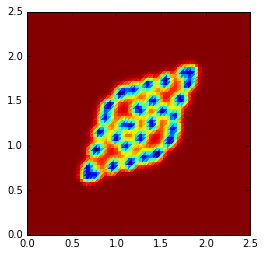

In [12]:
from dolfin import *
import random
t = 0. # Initial time
T = 1000. # Final time
ts = 10. # Timestep

# Define mesh and function spaces
n = 64; d = 2.5
mesh = RectangleMesh(Point(0.0, 0.0), Point(d, d), n, n)

P1 = FiniteElement("Lagrange", triangle, 1)
P1P1 = P1 * P1
Z = FunctionSpace(mesh, P1P1)
p, q = TestFunctions(Z)

# Set a randomized initial condition
class RandExpression(Expression):
    def eval(self, value, x):
        if abs(x[0] - d/2) <= 0.1 and abs(x[1] - d/2) <= 0.1:
            value[0] = 0.5 * (1.0 + 0.01 * random.random())
            value[1] = 0.25 * (1.0 + 0.01 * random.random())
        else:
            value[0] = 1. * (1.0 + 0.01 * random.random())
            value[1] = 0. * (1.0 + 0.01 * random.random())

    def value_shape(self):
        return (2,)

z = Function(Z)
(u, v) = split(z)
z0 = interpolate(RandExpression(), Z)
(u0, v0) = split(z0)

# Define the model constants
Du = Constant(2*10**-5) # Diffusion coefficient for variable u
Dv = Constant(10**-5) # Diffusion coefficient for variable v
k = Constant(0.055) # Rate constant for the second reaction
Fr = Constant(0.02) # Feed rate

# Define the weak formulation of the Gray-Scott equations
F = (((u - u0)/ts)*p*dx + Du * inner(grad(u), grad(p)) * dx + u*v*v*p * dx - Fr * (1-u)*p * dx +
     ((v - v0)/ts)*q*dx + Dv * inner(grad(v), grad(q)) * dx - u*v*v*q * dx + (k+Fr) * v*q * dx)

# Run the timeloop
vtu = File("results/z.pvd")
while t < T:
    solve(F == 0, z)
    if t%25 == 0:
      vtu << (z, t)
      print "Timelevel ", t
    z0.assign(z)
    t += ts
plot(z0[0])   

# Installation and getting help

## Installation using docker (Windows/MacOSX/Linux)

<img src="large_v-trans.png" alt="Docker" style="width: 200px;"/>


1. Install Docker for your platform: Windows, Mac or Linux.

2. Install the FEniCS Docker script:
```bash
curl -s https://get.fenicsproject.org | bash
```
3. Run
```bash
fenicsproject run
```

## Installation using Ubuntu packages (Ubuntu Linux)

FEniCS offers Debian and Ubuntu packages for installation:

```bash
add-apt-repository ppa:fenics-packages/fenics
apt-get update
apt-get install fenics
apt-get dist-upgrade
```

### How to get started?
* The (not yet finalised) FEniCS tutorial
http://hplgit.github.io/fenics-tutorial/doc/web

* Official FEniCS documentation https://fenicsproject.org/documentation/

* The FEniCS book
<img src="fenicsbook.jpg" alt="FeniCS book" style="width: 400px;"/>

### Where to get help?

FEniCS Question and Answer Forum 

<center>
<img src="fenicsqa.png" alt="FeniCS book" style="width: 1024px;"/>
https://fenicsproject.org/qa/
</center>

# Summary

FEniCS automates the Finite Element Method.

You can use it to solve;
* linear and non-linear PDEs;
* steady-state and time-dependent PDEs;
* single and coupled PDEs;
* to run in serial or parallel;
* in 1D, 2D and 3D;
* with various discretization options. 

**Get started at www.fenicsproject.org**

Slides URL: goo.gl/pR68a5

## Commands required to run these lecture slides
```bash
fenicsproject notebook slides
fenicsproject start slides
```
For presentation, install the following dependencies:

In [6]:
!pip install RISE --user
!jupyter nbextension install rise --py --user
!jupyter nbextension enable rise --py --user

Installing /home/fenics/.local/lib/python2.7/site-packages/rise/static -> rise
Up to date: /home/fenics/.local/share/jupyter/nbextensions/rise/main.js
Up to date: /home/fenics/.local/share/jupyter/nbextensions/rise/reset_reveal.css
Up to date: /home/fenics/.local/share/jupyter/nbextensions/rise/main.css
Up to date: /home/fenics/.local/share/jupyter/nbextensions/rise/main.orig.css
Up to date: /home/fenics/.local/share/jupyter/nbextensions/rise/reveal.js/Gruntfile.js
Up to date: /home/fenics/.local/share/jupyter/nbextensions/rise/reveal.js/package.json
Up to date: /home/fenics/.local/share/jupyter/nbextensions/rise/reveal.js/README.md
Up to date: /home/fenics/.local/share/jupyter/nbextensions/rise/reveal.js/index.html
Up to date: /home/fenics/.local/share/jupyter/nbextensions/rise/reveal.js/LICENSE
Up to date: /home/fenics/.local/share/jupyter/nbextensions/rise/reveal.js/lib/font/league_gothic-webfont.woff
Up to date: /home/fenics/.local/share/jupyter/nbextensions/rise/reveal.js/lib/font